<a href="https://colab.research.google.com/github/ancestor9/Gyeongbok-AI-study/blob/main/20250203_svm_hyperparameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SVM(Support Vector Machine)**
## **SVM Hyperparameter Tuning using GridSearchCV**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

## 1. Data

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
iris.keys()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['class'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 2. Split_train/test data

In [4]:
from sklearn.model_selection import train_test_split
X = df.drop('class', axis=1).iloc[:, :2]
y = df['class']

## 3. A function which returns the corresponding SVC model

In [5]:
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [6]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']

def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', max_iter =500, degree=8, gamma="auto")

    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', max_iter =500, gamma="auto")

    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', max_iter =500, gamma="auto")

    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', max_iter =500, gamma="auto")

In [9]:
for i in range(4):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
    svclassifier = getClassifier(i)
    svclassifier.fit(X_train, y_train) # Make prediction
    y_pred = svclassifier.predict(X_test) # Evaluate our model

    print("Evaluation:", kernels[i], "kernel\n")
    print(classification_report(y_test,y_pred))
    print('*'*100)

Evaluation: Polynomial kernel

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.14      0.33      0.20         6
           2       0.33      0.14      0.20        14

    accuracy                           0.47        30
   macro avg       0.49      0.49      0.47        30
weighted avg       0.52      0.47      0.47        30

****************************************************************************************************
Evaluation: RBF kernel

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.62      0.71      0.67         7
           2       0.85      0.79      0.81        14

    accuracy                           0.83        30
   macro avg       0.82      0.83      0.83        30
weighted avg       0.84      0.83      0.84        30

**********************************************************************************

## 4. Tunning points : (1) kernel, (2) margin_c (3) gamma

<img src = 'https://media.istockphoto.com/id/488054426/ko/%EC%82%AC%EC%A7%84/%EA%B2%BD%EC%B2%AD-%EB%9D%BC%EB%94%94%EC%98%A4%ED%8F%B0%EC%97%90.webp?a=1&b=1&s=612x612&w=0&k=20&c=8C6LRzNspZ_qXvCRy9MZKyLrqrDmIhC0MZulMl80_C0='>

### 4.1. Kernels (Train a SVC model using different kernal)
The main function of the kernel is to take low dimensional input space and transform it into a higher-dimensional space. It is mostly useful in non-linear separation problem.

In [10]:
from mlxtend.plotting import plot_decision_regions

def plot_model(X, y, clf) :
    print('*'*50); print(clf)
    clf.fit(X, y)
    plt.figure(figsize=(12,3))
    plot_decision_regions(X, y, clf=clf, legend=2)
    plt.title(clf)

**************************************************
SVC(degree=8, gamma='auto', kernel='poly', max_iter=500)
**************************************************
SVC(gamma='auto', max_iter=500)
**************************************************
SVC(gamma='auto', kernel='sigmoid', max_iter=500)
**************************************************
SVC(gamma='auto', kernel='linear', max_iter=500)


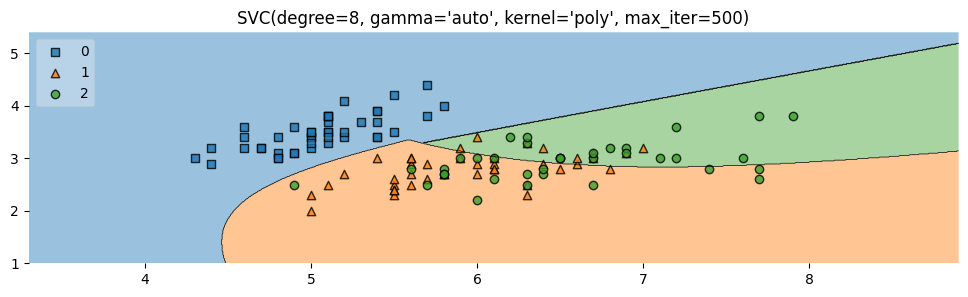

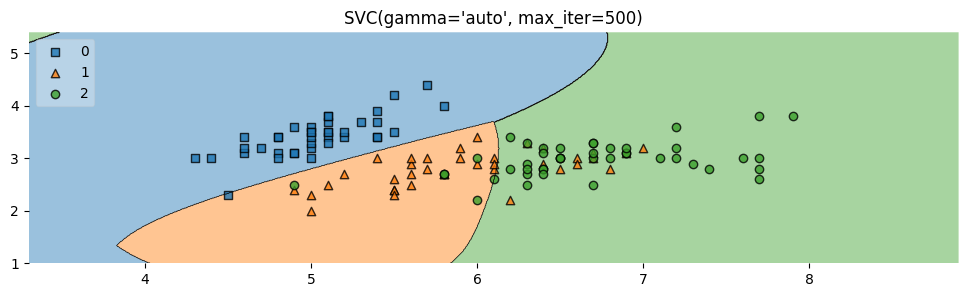

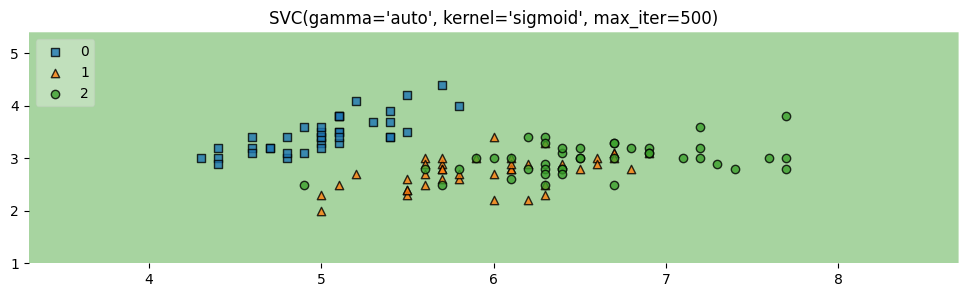

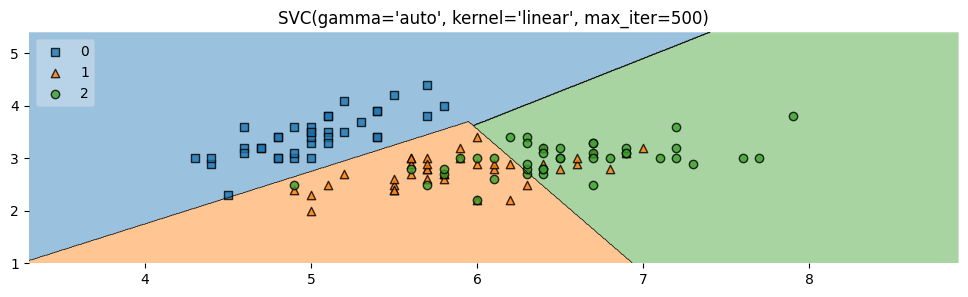

In [11]:
for i in range(4):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
    svclassifier = getClassifier(i)
    plot_model(X_train.values, y_train.values, svclassifier)

### 4.2. C(margin)
C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimisation how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term.
when C is high it will classify all the data points correctly, also there is a chance to overfit.

In [12]:
def getClassifier_c(ktype):
    if ktype == 0:
        return SVC(kernel='rbf', max_iter =500, C = 0.05)
    elif ktype == 1:
        return SVC(kernel='rbf', max_iter =500, C = 0.1)
    elif ktype == 2:
        return SVC(kernel='rbf', max_iter =500, C = 1.0)
    elif ktype == 3:
        return SVC(kernel='rbf', max_iter =500, C = 10)

**************************************************
SVC(C=0.05, max_iter=500)
**************************************************
SVC(C=0.1, max_iter=500)
**************************************************
SVC(max_iter=500)
**************************************************
SVC(C=10, max_iter=500)


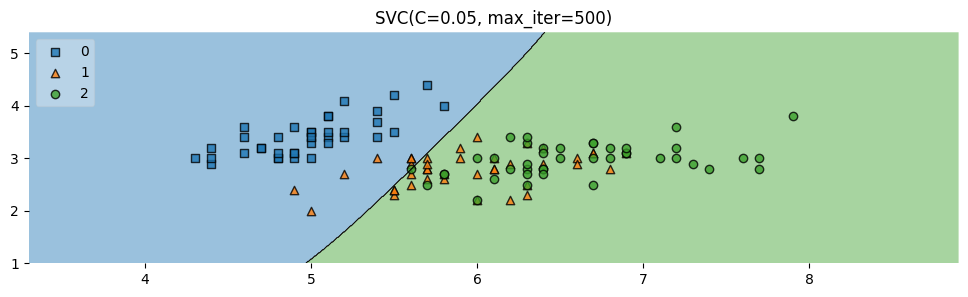

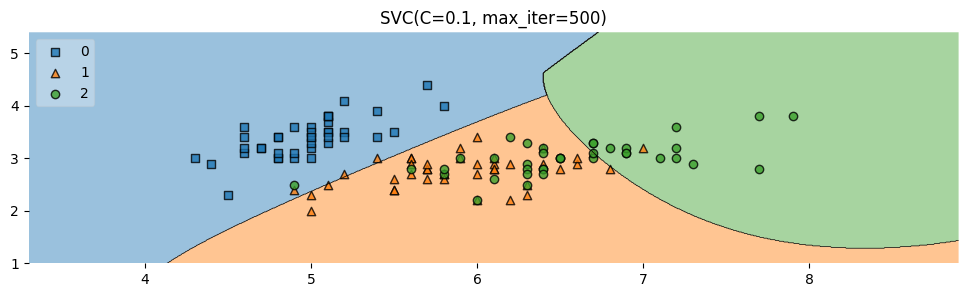

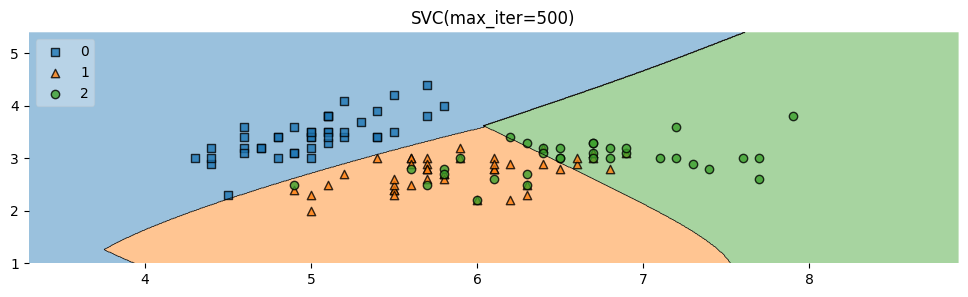

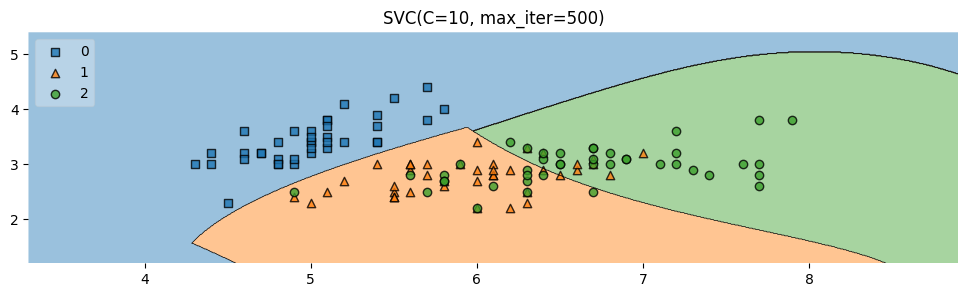

In [13]:
for i in range(4):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
    svclassifier = getClassifier_c(i)
    plot_model(X_train.values, y_train.values, svclassifier)

### 4.3. gamma
It defines how far influences the calculation of plausible line of separation.
When gamma is higher, nearby points will have high influence; low gamma means far away points also be considered to get the decision boundary.

In [14]:
def getClassifier_c(ktype):
    if ktype == 0:
        return SVC(kernel='rbf', max_iter =500, gamma=0.01)
    elif ktype == 1:
        return SVC(kernel='rbf', max_iter =500, gamma=0.1)
    elif ktype == 2:
        return SVC(kernel='rbf', max_iter =500, gamma=1.0)
    elif ktype == 3:
        return SVC(kernel='rbf', max_iter =500, gamma=10)

**************************************************
SVC(gamma=0.01, max_iter=500)
**************************************************
SVC(gamma=0.1, max_iter=500)
**************************************************
SVC(gamma=1.0, max_iter=500)
**************************************************
SVC(gamma=10, max_iter=500)


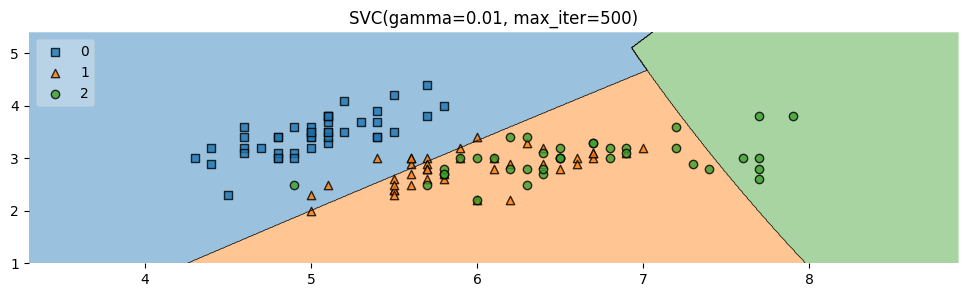

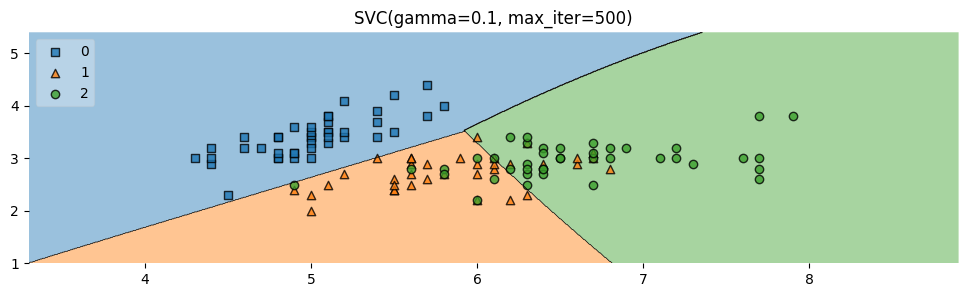

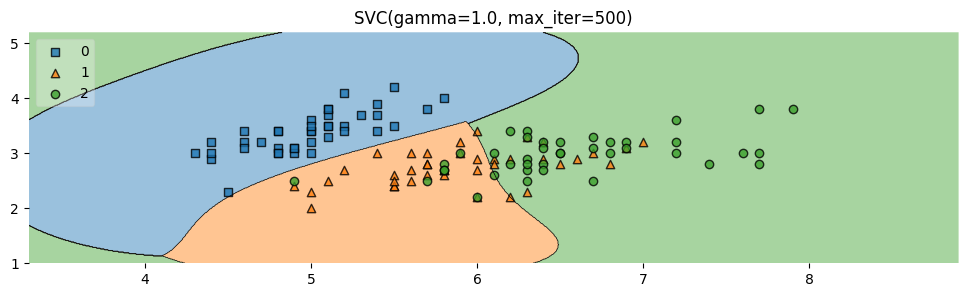

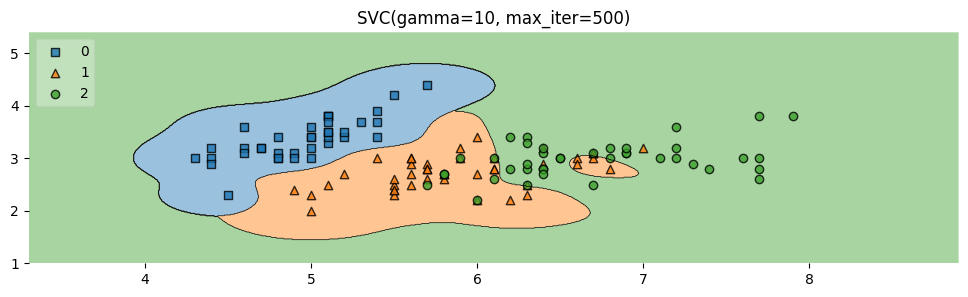

In [15]:
for i in range(4):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
    svclassifier = getClassifier_c(i)
    plot_model(X_train.values, y_train.values, svclassifier)

## 5. Tuning the hyper-parameters of an estimator
- Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn, they are passed as arguments to the constructor of the estimator classes.
- Grid search is commonly used as an approach to hyper-parameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid.
- GridSearchCV helps us combine an estimator with a grid search preamble to tune hyper-parameters.

In [16]:
from sklearn.model_selection import GridSearchCV

Create a dictionary called param_grid and fill out some parameters for kernels, C and gamma

In [17]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [18]:
grid = GridSearchCV(SVC(max_iter=500), param_grid, refit=True, verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(max_iter=500),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [19]:
print(grid.best_estimator_)

SVC(C=100, gamma=0.01, kernel='sigmoid', max_iter=500)


In [20]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[13  0  0]
 [ 0  4  3]
 [ 0  5  5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.44      0.57      0.50         7
           2       0.62      0.50      0.56        10

    accuracy                           0.73        30
   macro avg       0.69      0.69      0.69        30
weighted avg       0.75      0.73      0.74        30



## **Randomgrid Search**
<img src='https://attachments.datarian.io/production-34c9ae01-2240-442f-83f2-974f06b97742-BDYKnmjJvHu5Neg7tlUrzDkroj7FzEUoCJkLXgD0TFY.png'>

In [22]:
# prompt: param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}에서 C와 gamma를 데이터의 분포 형태로 만들어 randomgridsearch 해주라

# import warnings
# import pandas as pd
# import numpy as np
# from sklearn.svm import SVC
# from sklearn.metrics import classification_report, confusion_matrix
# import matplotlib.pyplot as plt
# from sklearn import datasets
# from sklearn.model_selection import train_test_split
# from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform

# ... (rest of the code from the provided file)

# ## 5. Tuning the hyper-parameters of an estimator using RandomizedSearchCV
# Create a dictionary called param_distributions and fill out some parameters for kernels, C and gamma

param_distributions = {'C': loguniform(1e-2, 1e3),
                       'gamma': loguniform(1e-3, 1e0),
                       'kernel': ['rbf', 'poly', 'sigmoid']}

random_grid = RandomizedSearchCV(SVC(max_iter=500), param_distributions,
                                 n_iter=50,
                                 cv=5,
                                 verbose=2, random_state=42) # n_iter controls the number of parameter settings sampled.
random_grid.fit(X_train,y_train)

print(random_grid.best_estimator_)
grid_predictions = random_grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=0.7459343285726545, gamma=0.711447600934342, kernel=sigmoid; total time=   0.0s
[CV] END C=0.7459343285726545, gamma=0.711447600934342, kernel=sigmoid; total time=   0.0s
[CV] END C=0.7459343285726545, gamma=0.711447600934342, kernel=sigmoid; total time=   0.0s
[CV] END C=0.7459343285726545, gamma=0.711447600934342, kernel=sigmoid; total time=   0.0s
[CV] END C=0.7459343285726545, gamma=0.711447600934342, kernel=sigmoid; total time=   0.0s
[CV] END C=79.15074397656205, gamma=0.061737703947045704, kernel=poly; total time=   0.0s
[CV] END C=79.15074397656205, gamma=0.061737703947045704, kernel=poly; total time=   0.0s
[CV] END C=79.15074397656205, gamma=0.061737703947045704, kernel=poly; total time=   0.0s
[CV] END C=79.15074397656205, gamma=0.061737703947045704, kernel=poly; total time=   0.0s
[CV] END C=79.15074397656205, gamma=0.061737703947045704, kernel=poly; total time=   0.0s
[CV] END C=0.060252157362038566, 

In [29]:
grid_predictions

array([0, 0, 1, 0, 2, 1, 1, 1, 2, 0, 0, 2, 0, 1, 1, 0, 2, 0, 0, 1, 0, 2,
       2, 0, 1, 0, 2, 0, 2, 1])

In [30]:
# prompt: grid_predictions 확률로 구하기

print(random_grid.predict_proba(X_test))


AttributeError: This 'RandomizedSearchCV' has no attribute 'predict_proba'

In [34]:
# Initialize SVC with probability=True
random_grid = RandomizedSearchCV(SVC(max_iter=500, probability=True),  # Change is here
                                 param_distributions,
                                 n_iter=50,
                                 cv=5,
                                 verbose=1, random_state=42) # n_iter controls the number of parameter settings sampled.
random_grid.fit(X_train,y_train)
random_grid.predict_proba(X_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


array([[0.98259042, 0.00995594, 0.00745364],
       [0.72021761, 0.13158226, 0.14820013],
       [0.0098779 , 0.53792201, 0.45220009],
       [0.89707837, 0.07799123, 0.02493039],
       [0.02406915, 0.39644135, 0.5794895 ],
       [0.01890122, 0.62266915, 0.35842963],
       [0.02564428, 0.71784936, 0.25650636],
       [0.32812573, 0.62096625, 0.05090802],
       [0.00866499, 0.33658362, 0.65475139],
       [0.99403909, 0.00300171, 0.0029592 ],
       [0.96576549, 0.01964069, 0.01459382],
       [0.00478665, 0.38042681, 0.61478654],
       [0.92159311, 0.05404791, 0.02435898],
       [0.00375959, 0.54090968, 0.45533073],
       [0.01371403, 0.58142917, 0.40485679],
       [0.98925001, 0.00290133, 0.00784865],
       [0.00141478, 0.2110256 , 0.78755962],
       [0.62585381, 0.25362828, 0.12051791],
       [0.65522228, 0.24549253, 0.09928518],
       [0.06691635, 0.69718244, 0.23590121],
       [0.93446042, 0.03112208, 0.0344175 ],
       [0.00543362, 0.24268838, 0.75187801],
       [0.

In [36]:
random_grid = RandomizedSearchCV(SVC(max_iter=500),  # Change is here
                                 param_distributions,
                                 n_iter=50,
                                 cv=5,
                                 verbose=0, random_state=42) # n_iter controls the number of parameter settings sampled.
random_grid.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(max_iter=500), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ad425cc75d0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ad425ae48d0>,
                                        'kernel': ['rbf', 'poly', 'sigmoid']},
                   random_state=42)

In [45]:
random_grid.best_estimator_

SVC(C=406.79084943595393, gamma=0.0018427970406864537, kernel='sigmoid',
    max_iter=500)

In [46]:
random_grid.best_estimator_.get_params()

{'C': 406.79084943595393,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.0018427970406864537,
 'kernel': 'sigmoid',
 'max_iter': 500,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## **최적모형의 파라미터(dictionary 형태)를 모든 펼쳐서 default svc()에 복사하는 방법**

In [50]:
# prompt: random_grid.best_estimator_.get_params() 의 결과값을 svc()의 기본 default 파라미터에 복사하는 방법

print(SVC().get_params())

# Get the best parameters from the random search
best_params = random_grid.best_estimator_.get_params()

# Create a new SVC classifier with the best parameters
svc_best = SVC(**best_params)

# Now svc_best has the same parameters as random_grid.best_estimator_
print(svc_best.get_params())


{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
{'C': 406.79084943595393, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.0018427970406864537, 'kernel': 'sigmoid', 'max_iter': 500, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [51]:
# prompt: svc_best를 파일로 저장해줘

import pickle

# Assuming 'svc_best' is defined as in your provided code
# ... (your existing code) ...

# Save the svc_best model to a file
with open('svc_best_model.pkl', 'wb') as file:
    pickle.dump(svc_best, file)

print("svc_best model saved to svc_best_model.pkl")


svc_best model saved to svc_best_model.pkl


In [52]:
# prompt: svc_best를 파일로 저장해줘.  with 구문없이 open 없이

import pickle
pickle.dump(svc_best, open('svc_best_model.pkl', 'wb'))
print("svc_best model saved to svc_best_model.pkl")

svc_best model saved to svc_best_model.pkl


In [53]:
# prompt: svc_best_model  예측모형파일 불러줘

import pickle
# Load the saved model
with open('svc_best_model.pkl', 'rb') as file:
    svc_best_model = pickle.load(file)

print("svc_best_model loaded successfully.")


svc_best_model loaded successfully.


In [40]:
# prompt: random_grid 에서 SVM에서 거리를 구하려면

import numpy as np

# Assuming 'random_grid' is the fitted RandomizedSearchCV object from your code
# and X_test is your test data.

# Get the decision function values for each data point in X_test
decision_function = random_grid.decision_function(X_test)
decision_function

array([[ 2.2601001 ,  1.0352851 , -0.26195659],
       [ 2.18419473, -0.13923958,  0.88630098],
       [-0.26511957,  2.23906383,  1.19152785],
       [ 2.2288771 ,  1.16668291, -0.25380397],
       [-0.2510381 ,  1.20218875,  2.20046416],
       [-0.25102314,  2.23478015,  1.13342761],
       [-0.23879326,  2.23800419,  1.00945222],
       [ 1.07879765,  2.24101825, -0.24830791],
       [-0.26922816,  1.22084832,  2.23033921],
       [ 2.27152023,  0.9885218 , -0.27110872],
       [ 2.25050971,  1.00143132, -0.25059837],
       [-0.27612833,  1.23806065,  2.2331811 ],
       [ 2.23523294,  1.11697178, -0.24869898],
       [-0.27714297,  2.25298546,  1.21358384],
       [-0.25873278,  2.2369696 ,  1.16742373],
       [ 2.26750952,  0.80277862, -0.24112645],
       [-0.28692701,  1.2391367 ,  2.26155973],
       [ 2.16027213,  1.09347647, -0.18939575],
       [ 2.16930313,  1.12244452, -0.20575422],
       [-0.19890359,  2.21773864,  0.90407869],
       [ 2.24070337,  0.85618548, -0.215

In [42]:

# Example: Calculate the distance to the hyperplane for the first data point
distance_to_hyperplane = decision_function[0]

print(f"Distance to the hyperplane for the first data point: {distance_to_hyperplane}")


Distance to the hyperplane for the first data point: [ 2.2601001   1.0352851  -0.26195659]


In [43]:

# Calculate distances for all data points:
distances = np.abs(decision_function)

print("\nDistances to the hyperplane for all data points:")
distances



Distances to the hyperplane for all data points:


array([[2.2601001 , 1.0352851 , 0.26195659],
       [2.18419473, 0.13923958, 0.88630098],
       [0.26511957, 2.23906383, 1.19152785],
       [2.2288771 , 1.16668291, 0.25380397],
       [0.2510381 , 1.20218875, 2.20046416],
       [0.25102314, 2.23478015, 1.13342761],
       [0.23879326, 2.23800419, 1.00945222],
       [1.07879765, 2.24101825, 0.24830791],
       [0.26922816, 1.22084832, 2.23033921],
       [2.27152023, 0.9885218 , 0.27110872],
       [2.25050971, 1.00143132, 0.25059837],
       [0.27612833, 1.23806065, 2.2331811 ],
       [2.23523294, 1.11697178, 0.24869898],
       [0.27714297, 2.25298546, 1.21358384],
       [0.25873278, 2.2369696 , 1.16742373],
       [2.26750952, 0.80277862, 0.24112645],
       [0.28692701, 1.2391367 , 2.26155973],
       [2.16027213, 1.09347647, 0.18939575],
       [2.16930313, 1.12244452, 0.20575422],
       [0.19890359, 2.21773864, 0.90407869],
       [2.24070337, 0.85618548, 0.21595035],
       [0.27507201, 1.21636455, 2.24723597],
       [0.

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/800px-SVM_margin.png'>